# Get <Bz> over average optical height depth in the FDT pixel at origin (first 36x36)

- load Bz 200000 at 200G
- get the maptau results for optical depth
- average over -1 to -2 optical depth for line core?

In [8]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import scipy.stats as stats

In [9]:
tdir = "/data/sunrise/mhd/MURaM/MySimulations/MURaM_RUN_1/"
cube = "20111012.200G.ngrey.288x100x288/"
bz_200 = fits.getdata(tdir + cube + 'result_6.200000.fits').astype(np.float64)*np.sqrt(4*np.pi)

In [77]:
atmos_200 = fits.getdata("/export/local/scratch/sinjan/spinor_mtau/ngrey_200G/6173_masi_theta00/inverted_atmos_maptau.1.fits")

In [46]:
atmos_200.shape

(11, 77, 288, 288)

In [52]:
atmos_200[8,:,:,:].shape

(77, 288, 288)

In [4]:
atmos_200hdr = fits.getheader("/export/local/scratch/sinjan/spinor_mtau/ngrey_200G/6173_masi_theta00/inverted_atmos_maptau.1.fits")

In [38]:
atmos_200hdr

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    4 / number of data axes                            
NAXIS1  =                  288 / length of data axis 1                          
NAXIS2  =                  288 / length of data axis 2                          
NAXIS3  =                   77 / length of data axis 3                          
NAXIS4  =                   11 / length of data axis 4                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
CODE    = 'SPINOR  '           / inversion code                                 
LTTOP   =      -6.00000000E+00 / LG(TAU) at TOP of atmosphere                   
LTBOT   =       1.50000000E+

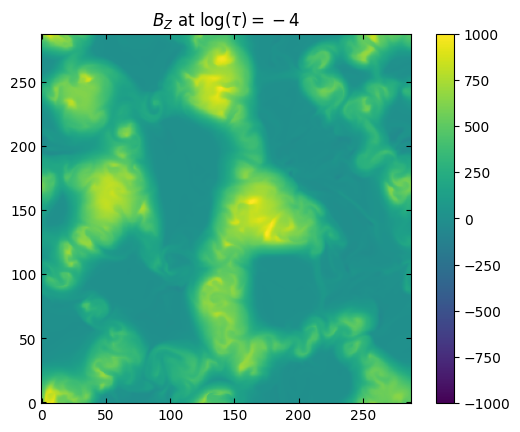

In [102]:
plt.figure()
m=21
plt.imshow(atmos_200[8,m,:,:]*np.cos(atmos_200[9,m,:,:]/180*np.pi),origin="lower")
plt.clim(-1000,1000)
plt.title(r'$B_Z$ at $\log(\tau)=-4$')
plt.tick_params(top=True, labeltop=False, bottom=True, left=True, right=True, labelbottom=True, direction="in")
plt.colorbar()
plt.savefig('./plots/logtau_4.png', bbox_inches='tight', dpi=300)

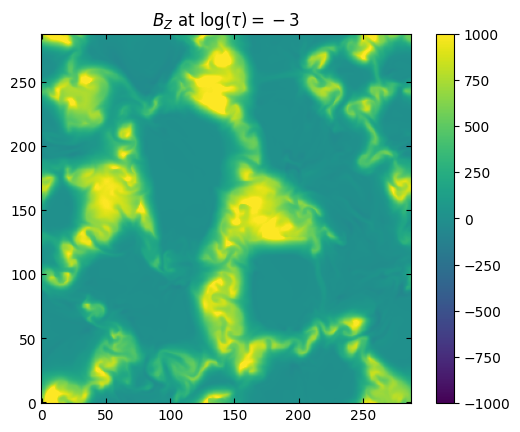

In [98]:
plt.figure()
m=31
plt.imshow(atmos_200[8,m,:,:]*np.cos(atmos_200[9,m,:,:]/180*np.pi),origin="lower")
plt.clim(-1000,1000)
plt.title(r'$B_Z$ at $\log(\tau)=-3$')
plt.tick_params(top=True, labeltop=False, bottom=True, left=True, right=True, labelbottom=True, direction="in")
plt.colorbar()
plt.savefig('./plots/logtau_3.png', bbox_inches='tight', dpi=300)

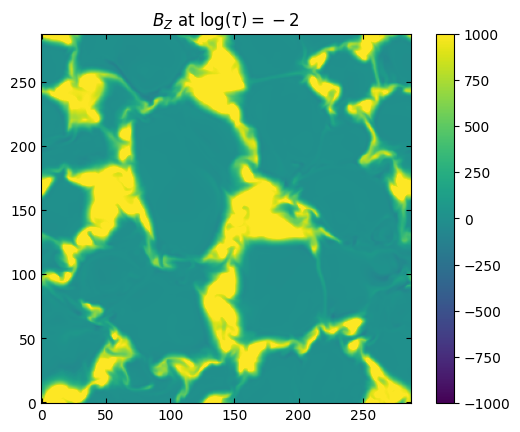

In [99]:
plt.figure()
m=41
plt.imshow(atmos_200[8,m,:,:]*np.cos(atmos_200[9,m,:,:]/180*np.pi),origin="lower")
plt.clim(-1000,1000)
plt.title(r'$B_Z$ at $\log(\tau)=-2$')
plt.tick_params(top=True, labeltop=False, bottom=True, left=True, right=True, labelbottom=True, direction="in")
plt.colorbar()
plt.savefig('./plots/logtau_2.png', bbox_inches='tight', dpi=300)

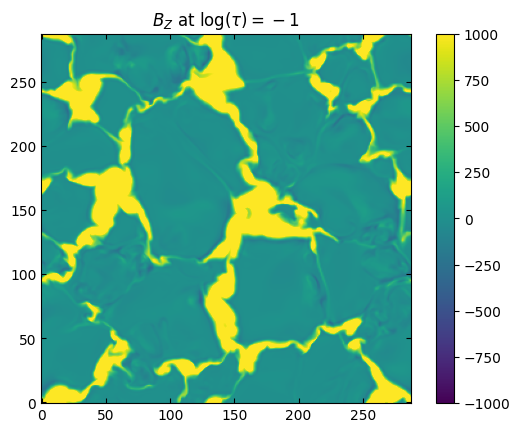

In [100]:
plt.figure()
m=51
plt.imshow(atmos_200[8,m,:,:]*np.cos(atmos_200[9,m,:,:]/180*np.pi),origin="lower")
plt.clim(-1000,1000)
plt.title(r'$B_Z$ at $\log(\tau)=-1$')
plt.tick_params(top=True, labeltop=False, bottom=True, left=True, right=True, labelbottom=True, direction="in")
plt.colorbar()
plt.savefig('./plots/logtau_1.png', bbox_inches='tight', dpi=300)

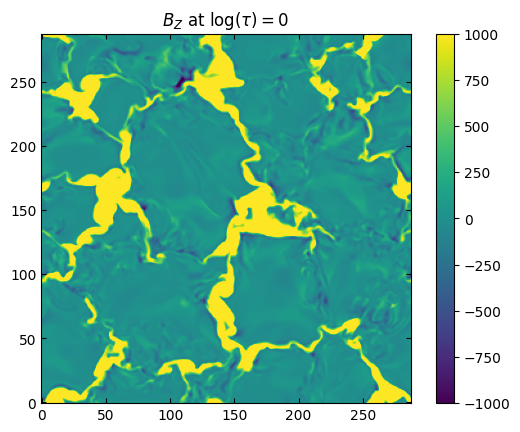

In [101]:
plt.figure()
m=61
plt.imshow(atmos_200[8,m,:,:]*np.cos(atmos_200[9,m,:,:]/180*np.pi),origin="lower")
plt.clim(-1000,1000)
plt.title(r'$B_Z$ at $\log(\tau)=0$')
plt.tick_params(top=True, labeltop=False, bottom=True, left=True, right=True, labelbottom=True, direction="in")
plt.colorbar()
plt.savefig('./plots/logtau_0.png', bbox_inches='tight', dpi=300)

In [78]:
lb = []
for m in range(77):
    lb.append(np.mean(atmos_200[8,m,:36,:36]*np.cos(atmos_200[9,m,:36,:36]/180*np.pi)))

In [60]:
tau_range = np.linspace(-6,1.5,76)
tau_range

array([-6. , -5.9, -5.8, -5.7, -5.6, -5.5, -5.4, -5.3, -5.2, -5.1, -5. ,
       -4.9, -4.8, -4.7, -4.6, -4.5, -4.4, -4.3, -4.2, -4.1, -4. , -3.9,
       -3.8, -3.7, -3.6, -3.5, -3.4, -3.3, -3.2, -3.1, -3. , -2.9, -2.8,
       -2.7, -2.6, -2.5, -2.4, -2.3, -2.2, -2.1, -2. , -1.9, -1.8, -1.7,
       -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1. , -0.9, -0.8, -0.7, -0.6,
       -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,
        0.6,  0.7,  0.8,  0.9,  1. ,  1.1,  1.2,  1.3,  1.4,  1.5])

In [17]:
tau_range[50:61]

array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ])

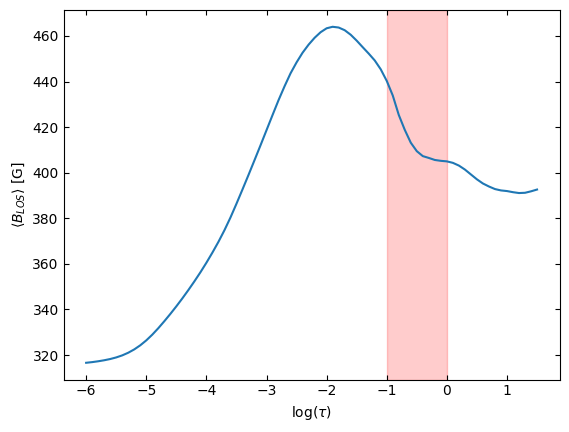

In [70]:
plt.plot(tau_range,lb[1:])
plt.ylabel(r"$\langle B_{LOS} \rangle$ [G]")
plt.xlabel(r"$\log(\tau)$")
plt.tick_params(top=True, labeltop=False, bottom=True, left=True, right=True, labelbottom=True, direction="in")
plt.axvspan(-1,0,alpha=0.2,color='red')
plt.savefig('./plots/subregion_blos_tau_mu1_ticks.png', bbox_inches='tight', dpi=300)

In [79]:
np.mean(lb[41:62])

435.45102

In [19]:
np.mean(lb[51:62])

415.49704

In [22]:
conv = stats.norm.pdf(tau_range, -1.5, 1)*np.array(lb[1:])
np.trapz(conv, dx=0.1)

436.6441384983714

In [24]:
def gaussian(x, mu, sig):
    return (
        1.0 / (np.sqrt(2.0 * np.pi) * sig) * np.exp(-np.power((x - mu) / sig, 2.0) / 2)
    )

In [84]:
lb = []
for m in range(77):
    lb.append(np.mean(atmos_200[8,m,:,:]*np.cos(atmos_200[9,m,:,:]/180*np.pi)))

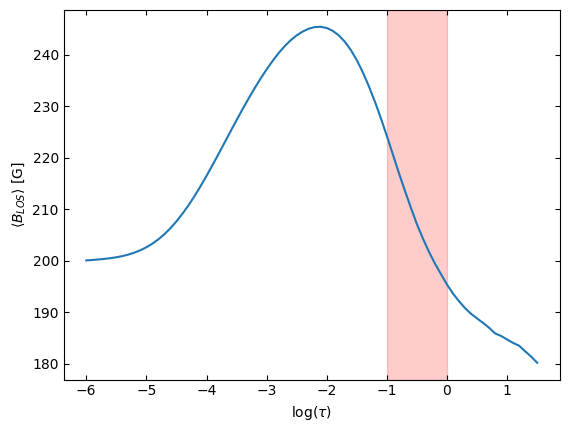

In [72]:
plt.plot(tau_range,lb[1:])
plt.ylabel(r"$\langle B_{LOS} \rangle$ [G]")
plt.xlabel(r"$\log(\tau)$")
plt.tick_params(top=True, labeltop=False, bottom=True, left=True, right=True, labelbottom=True, direction="in")
plt.axvspan(-1,0,alpha=0.2,color='red')
plt.savefig('./plots/region_blos_tau_mu1_ticks.png', bbox_inches='tight', dpi=300)

In [86]:
np.mean(lb[41:62])

222.66516

In [85]:
np.mean(lb[51:62])

208.27248

# $\mu=0.5$ 0,0 pixel, using the disc centre maptau output but accounting for foreshortening

In [10]:
atmos_200_60 = fits.getdata("/export/local/scratch/sinjan/spinor_mtau/ngrey_200G/6173_masi_theta60/inverted_atmos_maptau.1.fits")

In [11]:
lb = []
for m in range(77):
    lb.append(np.mean(atmos_200_60[8,m,:36*2,:36]*np.cos(atmos_200_60[9,m,:36*2,:36]/180*np.pi)))

In [12]:
tau_range = np.linspace(-6,1.5,76)
tau_range

array([-6. , -5.9, -5.8, -5.7, -5.6, -5.5, -5.4, -5.3, -5.2, -5.1, -5. ,
       -4.9, -4.8, -4.7, -4.6, -4.5, -4.4, -4.3, -4.2, -4.1, -4. , -3.9,
       -3.8, -3.7, -3.6, -3.5, -3.4, -3.3, -3.2, -3.1, -3. , -2.9, -2.8,
       -2.7, -2.6, -2.5, -2.4, -2.3, -2.2, -2.1, -2. , -1.9, -1.8, -1.7,
       -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1. , -0.9, -0.8, -0.7, -0.6,
       -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,
        0.6,  0.7,  0.8,  0.9,  1. ,  1.1,  1.2,  1.3,  1.4,  1.5])

In [12]:
tau_range[50:61]

array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ])

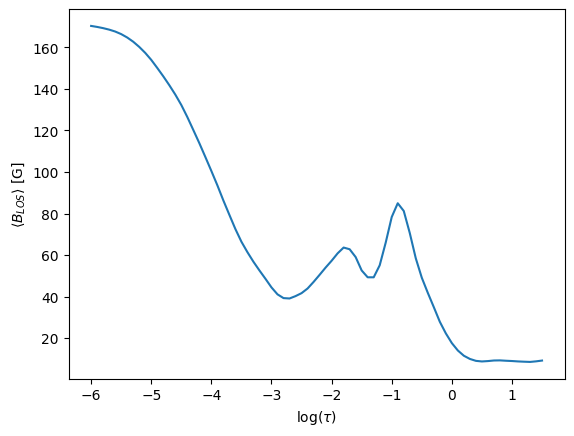

In [51]:
plt.plot(tau_range,lb[1:])
plt.ylabel(r"$\langle B_{LOS} \rangle$ [G]")
plt.xlabel(r"$\log(\tau)$")
plt.savefig('./plots/subregion_blos_tau_mu05.png', bbox_inches='tight', dpi=300)

In [83]:
np.mean(lb[31:62])

51.09565

In [7]:
np.mean(lb[41:58])

61.18816

In [13]:
np.mean(lb[51:62])

51.555233

In [14]:
np.mean(lb[41:62])

54.421574

In [95]:
conv = stats.norm.pdf(tau_range, -0.7, 0.5)*np.array(lb[1:])
np.trapz(conv, dx=0.1)

213.12488760132408

In [74]:
lb = []
for m in range(77):
    lb.append(np.mean(atmos_200_60[8,m,:,:]*np.cos(atmos_200_60[9,m,:,:]/180*np.pi)))

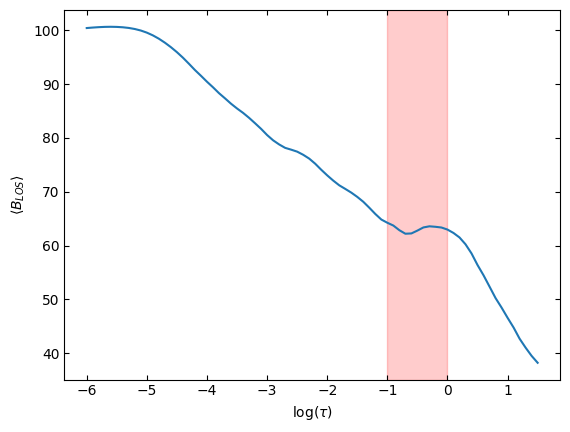

In [75]:
plt.plot(tau_range,lb[1:])
plt.ylabel(r"$\langle B_{LOS}\rangle$")
plt.xlabel(r"$\log(\tau)$")
plt.tick_params(top=True, labeltop=False, bottom=True, left=True, right=True, labelbottom=True, direction="in")
plt.axvspan(-1,0,alpha=0.2,color='red')
plt.savefig('./plots/region_blos_tau_mu05.png', bbox_inches='tight', dpi=300)

# $\mu=0.5$ 0,0 pixel, using the maptau output at $\mu=0.5$ and accounting for foreshortening

In [96]:
atmos_200_60 = fits.getdata("/export/local/scratch/sinjan/spinor_mtau/ngrey_200G/6173_masi_theta60/inverted_atmos_maptau.1.fits")

In [97]:
lb = []
for m in range(77):
    lb.append(np.mean(atmos_200_60[8,m,:36*2,:36]*np.cos(atmos_200_60[9,m,:36*2,:36]/180*np.pi)))

In [98]:
tau_range = np.linspace(-6,1.5,76)
tau_range

array([-6. , -5.9, -5.8, -5.7, -5.6, -5.5, -5.4, -5.3, -5.2, -5.1, -5. ,
       -4.9, -4.8, -4.7, -4.6, -4.5, -4.4, -4.3, -4.2, -4.1, -4. , -3.9,
       -3.8, -3.7, -3.6, -3.5, -3.4, -3.3, -3.2, -3.1, -3. , -2.9, -2.8,
       -2.7, -2.6, -2.5, -2.4, -2.3, -2.2, -2.1, -2. , -1.9, -1.8, -1.7,
       -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1. , -0.9, -0.8, -0.7, -0.6,
       -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,
        0.6,  0.7,  0.8,  0.9,  1. ,  1.1,  1.2,  1.3,  1.4,  1.5])

In [99]:
tau_range[50:61]

array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ])

Text(0.5, 0, '$\\log(\\tau)$')

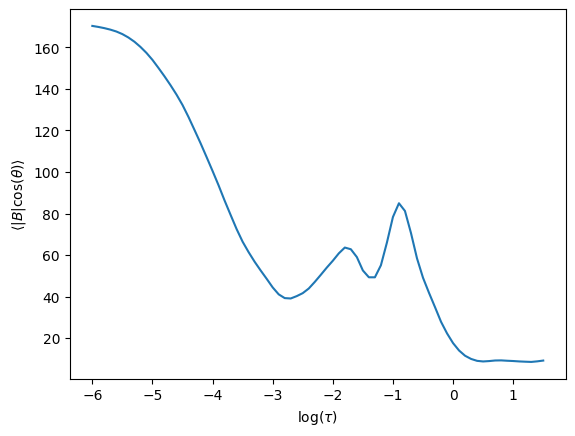

In [100]:
plt.plot(tau_range,lb[1:])
plt.ylabel(r"$\langle |B|\cos(\theta) \rangle$")
plt.xlabel(r"$\log(\tau)$")

In [101]:
np.mean(lb[51:62])

51.555233

In [102]:
conv = stats.norm.pdf(tau_range, -0.5, 0.5)*np.array(lb[1:])
np.trapz(conv, dx=0.1)

46.88478478221855

# 2,4 integranular lane

In [75]:
lb = []
for m in range(77):
    lb.append(np.mean(atmos_200[8,m,36*4:36*5,36*1:36*2]*np.cos(atmos_200[9,m,36*4:36*5,36*1:36*2]/180*np.pi)))

In [21]:
from blos_binning_helper import *

In [22]:
folder = 'ngrey_200G'
ang = '00'
snapshot = '200000'

og_blos = get_blos_inst_pixel(folder, ang, snapshot, 0.35, inst='MURaM', \
                               downscale_mean=False, remainder_mode='round', refwv=6173.341, \
                               dshape=288, pixel_res=20.833333, blos_method='CMILOS', \
                               return_mean=False, default_dir="/export/local/scratch/sinjan/spinor_fwd", \
                               initial_model=[400.,30.,120.,3.,0.05,1.5,0.01,0.22,0.85], niter=15)

--------START---------
Folder:  ngrey_200G
Snapshot:  200000
Angle:  00
Remainder mode:  round
inst_y:  288.0
inst_x: : 288.0
-------PREP END--------
----CMILOS BLOS------
Start wv index: 100
End wv index: 151

(288, 288, 4, 51)
Cmilos executable located at: /scratch/slam/sinjan/true_flux_project/cmilos/


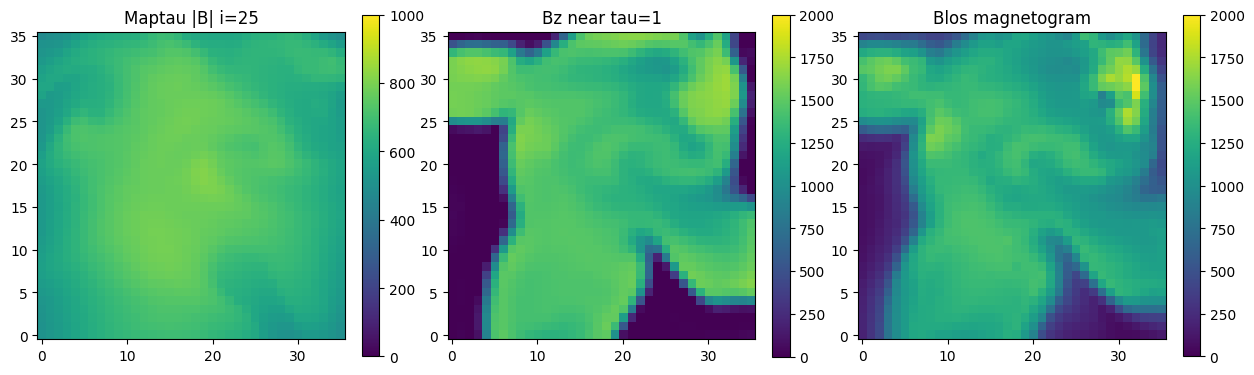

In [43]:
m = 19
plt.figure(figsize=(15,7))
plt.subplot(131)
plt.imshow(atmos_200[8,m,36*4:36*5,36*1:36*2],origin="lower")
plt.colorbar(fraction=0.05)
plt.clim(0,1000)
plt.title('Maptau |B| i=25')
plt.subplot(132)
plt.imshow(bz_200[36*4:36*5,60,36*1:36*2],origin="lower")
plt.colorbar(fraction=0.05)
plt.clim(0,2000)
plt.title('Bz near tau=1')
plt.subplot(133)
plt.imshow(og_blos[36*4:36*5,36*1:36*2],origin="lower")
plt.colorbar(fraction=0.05)
plt.title('Blos magnetogram')
plt.clim(0,2000)
plt.show()

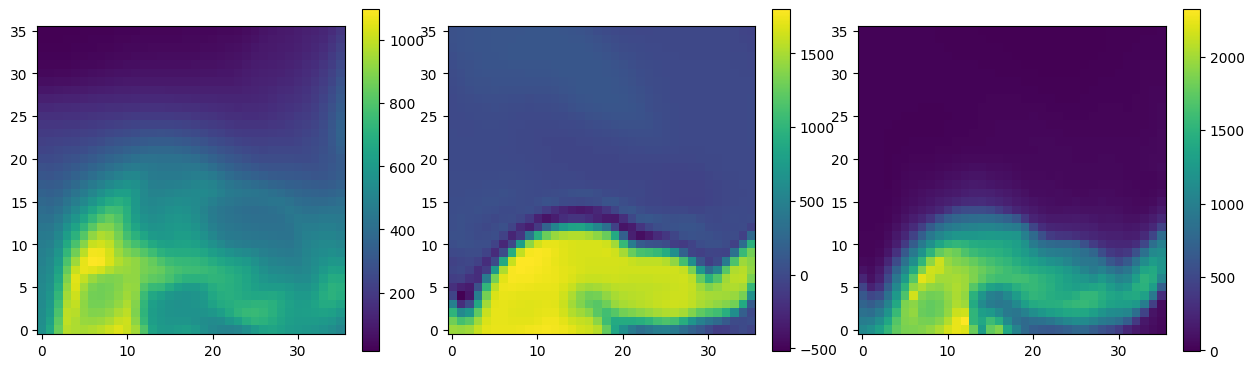

In [39]:
m = 25
plt.figure(figsize=(15,7))
plt.subplot(131)
plt.imshow(atmos_200[8,m,:36,:36],origin="lower")
plt.colorbar(fraction=0.05)
plt.subplot(132)
plt.imshow(bz_200[:36,60,:36],origin="lower")
plt.colorbar(fraction=0.05)
plt.subplot(133)
plt.imshow(og_blos[:36,:36],origin="lower")
plt.colorbar(fraction=0.05)
plt.show()

In [33]:
np.mean(bz_200[36*4:36*5,60,36*1:36*2])

1068.3292688164604

In [36]:
np.mean(bz_200[:36,60,:36])

368.0978216599089

In [19]:
np.mean(atmos_200[8,m,36*4:36*5,36*1:36*2])

859.8642

Text(0.5, 1.0, '[2,4]')

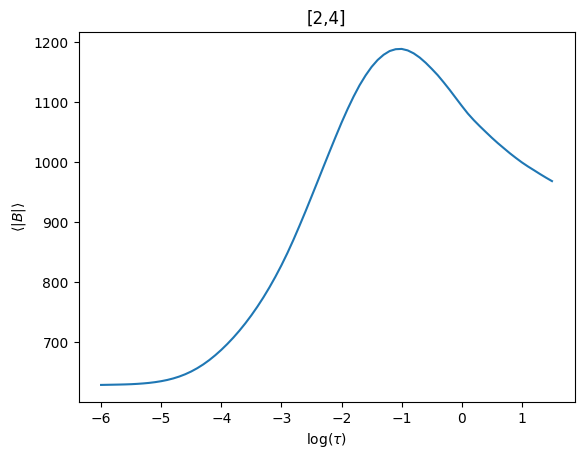

In [76]:
plt.plot(tau_range,lb[1:])
plt.ylabel(r"$\langle |B| \rangle$")
plt.xlabel(r"$\log(\tau)$")
plt.title('[2,4]')

In [100]:
lb = []
for m in range(32):
    lb.append(np.mean(atmos_200[8,m,36*6:36*7,36*3:36*4]*np.cos(atmos_200[9,m,36*6:36*7,36*3:36*4]/180*np.pi)))

In [99]:
36*3

108

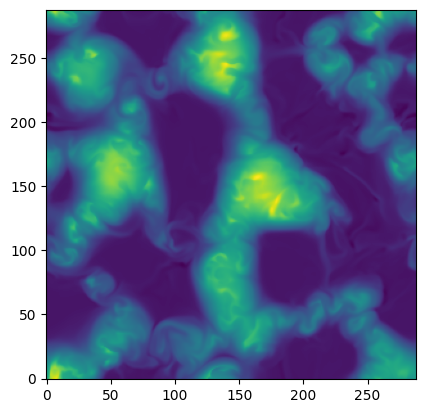

In [95]:
m=18
plt.imshow(atmos_200[8,m,:,:]*np.cos(atmos_200[9,m,:,:]/180*np.pi), origin = "lower")
plt.show()

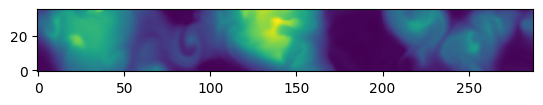

In [98]:
m=18
plt.imshow(atmos_200[8,m,36*6:36*7,:]*np.cos(atmos_200[9,m,36*6:36*7,:]/180*np.pi), origin = "lower")
plt.show()

In [101]:
tau_range = np.linspace(-6,1.5,31)

Text(0.5, 0, '$\\log(\\tau)$')

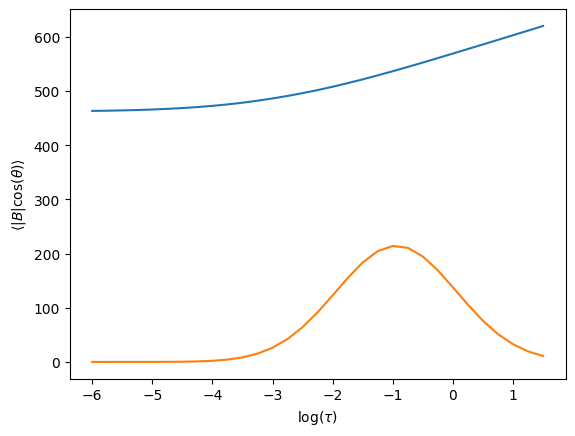

In [113]:
plt.plot(tau_range,lb[1:])
plt.plot(tau_range,conv)
plt.ylabel(r"$\langle |B|\cos(\theta) \rangle$")
plt.xlabel(r"$\log(\tau)$")

In [103]:
tau_range[18:25]

array([-1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ])

In [123]:
lb[19:26]

[521.54266, 528.8944, 536.56195, 544.47253, 552.5642, 560.81134, 569.16534]

In [105]:
np.mean(np.array(lb[19:26]))

544.85895

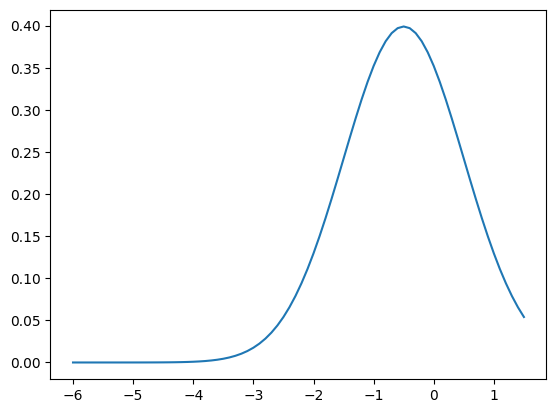

In [82]:
import scipy.stats as stats
import math

mu = -0.5
#variance = 1
sigma = math.sqrt(variance)
x = tau_range
plt.plot(x, stats.norm.pdf(x, mu, 1))
plt.show()

In [77]:
conv = stats.norm.pdf(tau_range, -0.5, 0.4)*np.array(lb[1:])
np.trapz(conv, dx=0.1)

In [78]:
np.trapz(conv, dx=0.1)

1146.1394052597304

In [81]:
np.mean(lb[51:62])

1149.552

# convert optical depth to geometric and avg over that

In [29]:
H0_200 = 85843686.3439699

In [28]:
def get_index(height, h0):
    height = height/1e8 #convert to Mm
    idx = height//0.014 #one box is 0.014Mm
    idx += int(h0/1e8/1.4*100)
    return idx.astype(int)

In [31]:
l_200 = []
for m in range(32):
    idxt = get_index(atmos_200[0,m,:,:], H0_200)
    #print(np.mean(idxt))
    t = np.zeros((36,36))
    for i in range(36):
        for j in range(36):
            t[i,j] = bz_200[i,idxt[i,j],j]
    l_200.append(np.mean(t))

Text(0.5, 0, '$\\log(\\tau)$ index')

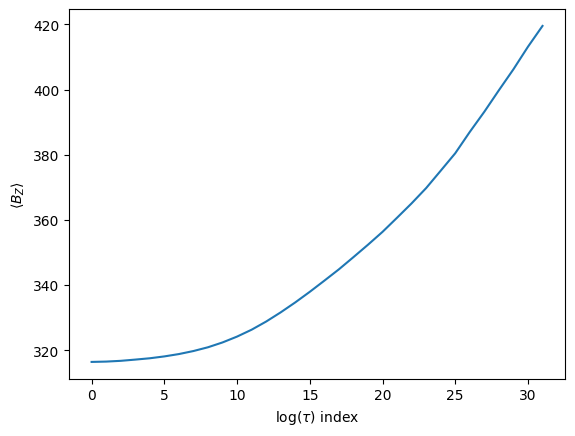

In [32]:
plt.plot(range(32),l_200)
plt.ylabel(r"$\langle B_Z \rangle$")
plt.xlabel(r"$\log(\tau)$ index")

In [35]:
np.mean(l_200[19:26])

365.677308732276

# difference from blos, could be due to MILOS being shit in bright points, of which there is one in 0,0 FDT region

In [44]:
from blos_binning_helper import create_stokes_profiles

stokes = create_stokes_profiles('ngrey_200G','00','200000',inst='MURaM')
Ic = stokes[:,:,0,100].mean()
stokes = stokes/Ic

--------START---------
Folder:  ngrey_200G
Snapshot:  200000
Angle:  00
Remainder mode:  round
inst_y:  288.0
inst_x: : 288.0
-------PREP END--------


In [45]:
idx = np.where((stokes[:,:,0,100]<0.85) & (stokes[:,:,0,100]>0.55))

In [46]:
idx[0].size

18306

In [47]:
18306/(288*288)

0.220703125

In [48]:
idx = np.where((stokes[:,:,0,100]>0.85) & (stokes[:,:,0,100]<1.15))

In [49]:
idx[0].size

47048

In [51]:
47048/(288*288)

0.5672260802469136

In [52]:
idx = np.where((stokes[:36,:36,0,100]<0.85) & (stokes[:36,:36,0,100]>0.55))

In [53]:
idx[0].size

42

In [54]:
idx[0].size/(36*36)

0.032407407407407406

In [55]:
idx = np.where((stokes[:36,:36,0,100]>0.85) & (stokes[:36,:36,0,100]<1.15))

In [56]:
idx[0].size

1070

In [57]:
idx[0].size/(36*36)

0.8256172839506173

In [66]:
idx = np.where(stokes[:36,:36,0,100]>1.4)
idx[0].size

19

In [67]:
idx[0].size/(36*36)

0.014660493827160493

In [68]:
idx = np.where(stokes[:,:,0,100]>1.4)
idx[0].size

263

In [69]:
idx[0].size/(288*288)

0.0031708140432098767

In [72]:
idx = np.where(stokes[36*3:36*4,36*3:36*4,0,100]>1.4)
idx[0].size

0

In [73]:
4*36

144

# think there must be an error in the output from maptau, the results just don't make sense